In [1]:
import requests
import json
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
url = "https://worldcup.sfg.io/teams/group_results"
res = requests.request("GET",url)
result= res.json()
#result 

In [2]:
import funciones as fn

In [3]:
a= fn.extraediccionario(result)
print(a)
b = fn.creaundataframe(a)
b.head()

[[{'id': 1, 'country': 'France', 'alternate_name': None, 'fifa_code': 'FRA', 'group_id': 1, 'group_letter': 'A', 'wins': 4, 'draws': 0, 'losses': 1, 'games_played': 5, 'points': 12, 'goals_for': 10, 'goals_against': 4, 'goal_differential': 6}, {'id': 3, 'country': 'Norway', 'alternate_name': None, 'fifa_code': 'NOR', 'group_id': 1, 'group_letter': 'A', 'wins': 2, 'draws': 1, 'losses': 2, 'games_played': 5, 'points': 7, 'goals_for': 7, 'goals_against': 7, 'goal_differential': 0}, {'id': 4, 'country': 'Nigeria', 'alternate_name': None, 'fifa_code': 'NGA', 'group_id': 1, 'group_letter': 'A', 'wins': 1, 'draws': 0, 'losses': 3, 'games_played': 4, 'points': 3, 'goals_for': 2, 'goals_against': 7, 'goal_differential': -5}, {'id': 2, 'country': 'Korea Republic', 'alternate_name': None, 'fifa_code': 'KOR', 'group_id': 1, 'group_letter': 'A', 'wins': 0, 'draws': 0, 'losses': 3, 'games_played': 3, 'points': 0, 'goals_for': 1, 'goals_against': 8, 'goal_differential': -7}], [{'id': 5, 'country': 'G

,id,country,alternate_name,fifa_code,group_id,group_letter,wins,draws,losses,games_played,points,goals_for,goals_against,goal_differential
0,1,France,None,FRA,1,A,4,0,1,5,12,10,4,6
1,3,Norway,None,NOR,1,A,2,1,2,5,7,7,7,0
2,4,Nigeria,None,NGA,1,A,1,0,3,4,3,2,7,-5
3,2,Korea Republic,None,KOR,1,A,0,0,3,3,0,1,8,-7
0,5,Germany,None,GER,2,B,4,0,1,5,12,10,2,8


In [4]:
b.columns

Index(['id', 'country', 'alternate_name', 'fifa_code', 'group_id',
       'group_letter', 'wins', 'draws', 'losses', 'games_played', 'points',
       'goals_for', 'goals_against', 'goal_differential'],
      dtype='object')

In [5]:
b.isnull().values.any()

True

In [6]:
b.isnull().sum()

id                    0
country               0
alternate_name       24
fifa_code             0
group_id              0
group_letter          0
wins                  0
draws                 0
losses                0
games_played          0
points                0
goals_for             0
goals_against         0
goal_differential     0
dtype: int64

In [7]:
b.drop(b.columns[[0, 2, 3]], axis='columns')
b.head()

,id,country,alternate_name,fifa_code,group_id,group_letter,wins,draws,losses,games_played,points,goals_for,goals_against,goal_differential
0,1,France,None,FRA,1,A,4,0,1,5,12,10,4,6
1,3,Norway,None,NOR,1,A,2,1,2,5,7,7,7,0
2,4,Nigeria,None,NGA,1,A,1,0,3,4,3,2,7,-5
3,2,Korea Republic,None,KOR,1,A,0,0,3,3,0,1,8,-7
0,5,Germany,None,GER,2,B,4,0,1,5,12,10,2,8


In [8]:
d=b.describe()
d.round(0)

,id,group_id,wins,draws,losses,games_played,points,goals_for,goals_against,goal_differential
count,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
mean,12.0,4.0,2.0,0.0,2.0,4.0,6.0,6.0,6.0,0.0
std,7.0,2.0,2.0,1.0,1.0,1.0,6.0,6.0,4.0,8.0
min,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0,-19.0
25%,7.0,2.0,0.0,0.0,2.0,3.0,2.0,2.0,4.0,-4.0
50%,12.0,4.0,1.0,0.0,2.0,4.0,4.0,4.0,5.0,-0.0
75%,18.0,5.0,3.0,1.0,3.0,5.0,10.0,9.0,7.0,5.0
max,24.0,6.0,7.0,2.0,3.0,7.0,21.0,26.0,20.0,23.0


En este caso se observa que el numero la media de partidos ganados y perdidos es la misma,es decir que no predomina uno sobre otro a priori.

In [9]:
df_1=b.groupby(['country']).agg({'wins':sum, 'draws':sum,'losses':sum })

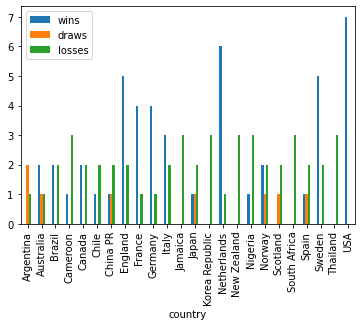

<Figure size 1440x720 with 0 Axes>

In [10]:
b.groupby('country').mean().loc[:,['wins','draws','losses']].plot(kind='bar')
plt.figure(figsize=(20,10))
plt.show()

In [ ]:
b.to_csv(r'input/apI.csv',index=False,header=True)